#### Importing the required packages

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from pandas import read_csv

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

#### Import the dataset

In [ ]:
df=read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
               sep=" ",header=None)
#Display first few rows in the data frame
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


In [ ]:
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]
# Categorical features has to be converted into integer values for the model to process. 
# This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns

In [ ]:
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


#### Visualize the clusters formed 

In [ ]:
def plot_points(X_red, y_pred):
    colors = ['r', 'b', 'y', 'c', 'm']
    for i in np.unique(y_pred):
            points = np.array([X_red[j] for j in range(len(X_red)) if y_pred[j] == i])
            plt.scatter(points[:,0], points[:,1], s=7, c=colors[i])

### Agglomerative clustering

Hierarchical clustering generally fall into two types:

**Agglomerative**: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
**Divisive**: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In this experiment we are going to use Agglomerative Clustering.

The linkage criteria determines the distance metric used for the merge strategy:

Here we use **ward** which minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but addressed with an agglomerative hierarchical approach.

You can also check with other linkage criteria **complete** and **average**

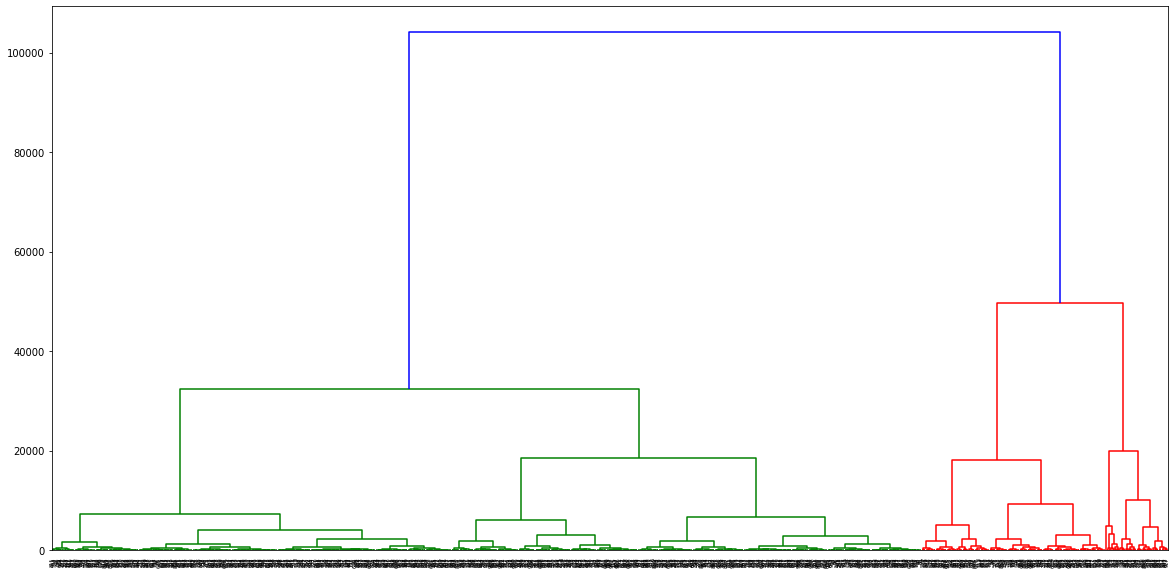

In [ ]:
# Plotting dendrograms to decid the number of clusters.
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
# Task 1
# From the above dendrogram choose the cluster of your choice:
n_clusters=2 # as per above dendogram 2 clusters would be nice

In [ ]:
# Task 2:
# Declare the agglomerative clustering method with the above chosen cluster number and pass it to the model.
# And train the model on the data(fit).
# model = ...
hc= AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='ward') 
model= hc.fit_predict(X)  
print(model)

[1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 

In [ ]:
#Reducing the dimension of the data points to 2 for visualization
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)

In [ ]:
#Labels assigned to the clusters formed.
y_pred =  hc.labels_

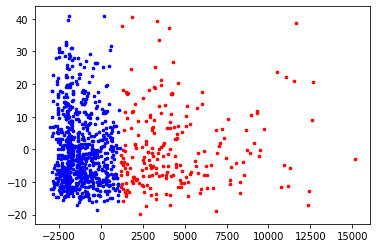

In [ ]:
#Dislplay the reduced dimension and the clusters formed on the original data
plot_points(X_red, y_pred)